## Bank speeches starter template

The [Kaggle data set](https://www.kaggle.com/datasets/davidgauthier/central-bank-speeches/data) used in this project use speeches from senior central bankers of various influential central banks. The corpus runs from 1997 until 2022. Central banks are institutions that define monetary policy. As such, central bank speeches are widely followed and have a major influence on financial markets.

You can also refer to the raw data set and article used [here](https://www.kaggle.com/datasets/magnushansson/central-bank-speeches).

Note that, due to the large number of speeches contained in the data set, you can expect long running times for processing intensive steps such as sentiment analysis when using the full data set (30-60 mins). It is recommended that you reduce the subset of data under review when creating your prototype and then run the full data set through, if required, once the code behaves as expected. You can reduce the data set to, for example, only process data from the United Kingdom (or other countries) or by looking at specific date ranges.

The code is not extensive and you will be expected to use the provided code as a starting point only. You will also need to use your own creativity and logic to identify useful patterns in the data. You can explore sentiment, polarity and entities/keywords, and should use appropriate levels of granularity and aggregation in order to analyse patterns contained in the data.

In [3]:
# Install the necessary libraries.
#!pip install nltk
#!pip install vaderSentiment
#!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 5.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Import relevant libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
# The function to determine whether there are missing values. 
def check_missing_values(df):
    if df.isnull().values.any():
        print("There are missing values in the DataFrame.")
    else:
        print("No missing values in the DataFrame.")

In [3]:
# Load dataset. Change directory as required.

df_all_speeches = pd.read_csv('C:\\Users\\elif.ozkol\\Desktop\\LSE Project\\all_speeches.csv')


In [4]:
df_all_speeches.head()

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


In [5]:
# Check for missing values

check_missing_values(df_all_speeches)

No missing values in the DataFrame.


In [6]:
# Dropping duplicates

df_all_speeches = df_all_speeches.drop_duplicates()

df_all_speeches

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."
...,...,...,...,...,...,...,...
7716,r221010a_FOMC,united states,2022-10-10,Restoring Price Stability in an Uncertain Econ...,brainard,0,It is a pleasure to join this discussion today...
7717,r221012b_FOMC,united states,2022-10-12,Managing the Promise and Risk of Financial Inn...,barr,0,"Thank you, Chris, and thank you for the invita..."
7718,r221012a_FOMC,united states,2022-10-12,Forward Guidance as a Monetary Policy Tool: Co...,bowman,0,Thanks to the Money Marketeers for inviting me...
7719,r221014a_FOMC,united states,2022-10-14,The U.S. Dollar and Central Bank Digital Curre...,waller,0,"Thank you, Professor Jackson, and thank you to..."


In [7]:
# Trim whitespace in text fields

text_columns = ['reference', 'country', 'title', 'author', 'text']
for col in text_columns:
    df_all_speeches[col] = df_all_speeches[col].astype(str).str.strip()

In [8]:
df_all_speeches

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."
...,...,...,...,...,...,...,...
7716,r221010a_FOMC,united states,2022-10-10,Restoring Price Stability in an Uncertain Econ...,brainard,0,It is a pleasure to join this discussion today...
7717,r221012b_FOMC,united states,2022-10-12,Managing the Promise and Risk of Financial Inn...,barr,0,"Thank you, Chris, and thank you for the invita..."
7718,r221012a_FOMC,united states,2022-10-12,Forward Guidance as a Monetary Policy Tool: Co...,bowman,0,Thanks to the Money Marketeers for inviting me...
7719,r221014a_FOMC,united states,2022-10-14,The U.S. Dollar and Central Bank Digital Curre...,waller,0,"Thank you, Professor Jackson, and thank you to..."


In [9]:
# Fill missing titles

df_all_speeches['title'] = df_all_speeches['title'].fillna('Untitled')
df_all_speeches['title'] = df_all_speeches['title'].replace('', 'Untitled')

df_all_speeches

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,Untitled,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,Untitled,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,Untitled,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,Untitled,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."
...,...,...,...,...,...,...,...
7716,r221010a_FOMC,united states,2022-10-10,Restoring Price Stability in an Uncertain Econ...,brainard,0,It is a pleasure to join this discussion today...
7717,r221012b_FOMC,united states,2022-10-12,Managing the Promise and Risk of Financial Inn...,barr,0,"Thank you, Chris, and thank you for the invita..."
7718,r221012a_FOMC,united states,2022-10-12,Forward Guidance as a Monetary Policy Tool: Co...,bowman,0,Thanks to the Money Marketeers for inviting me...
7719,r221014a_FOMC,united states,2022-10-14,The U.S. Dollar and Central Bank Digital Curre...,waller,0,"Thank you, Professor Jackson, and thank you to..."


In [10]:
# Change NO_INFO in the title column to Untitled

df_all_speeches['title'] = df_all_speeches['title'].replace('NO_INFO', 'Untitled')

df_all_speeches

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,Untitled,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,Untitled,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,Untitled,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,Untitled,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."
...,...,...,...,...,...,...,...
7716,r221010a_FOMC,united states,2022-10-10,Restoring Price Stability in an Uncertain Econ...,brainard,0,It is a pleasure to join this discussion today...
7717,r221012b_FOMC,united states,2022-10-12,Managing the Promise and Risk of Financial Inn...,barr,0,"Thank you, Chris, and thank you for the invita..."
7718,r221012a_FOMC,united states,2022-10-12,Forward Guidance as a Monetary Policy Tool: Co...,bowman,0,Thanks to the Money Marketeers for inviting me...
7719,r221014a_FOMC,united states,2022-10-14,The U.S. Dollar and Central Bank Digital Curre...,waller,0,"Thank you, Professor Jackson, and thank you to..."


In [11]:
# Capitalize the 'country' and 'author' columns

df_all_speeches['country'] = df_all_speeches['country'].str.title()
df_all_speeches['author'] = df_all_speeches['author'].str.title()

df_all_speeches

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,Australia,1990-11-28,A Proper Role for Monetary Policy,Fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,Australia,1991-10-03,Untitled,Fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,Australia,1992-03-14,Untitled,Fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,Australia,1992-05-29,Untitled,Fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,Australia,1992-08-17,Untitled,Fraser,0,"As a long-time fan of Don Sanders, I am deligh..."
...,...,...,...,...,...,...,...
7716,r221010a_FOMC,United States,2022-10-10,Restoring Price Stability in an Uncertain Econ...,Brainard,0,It is a pleasure to join this discussion today...
7717,r221012b_FOMC,United States,2022-10-12,Managing the Promise and Risk of Financial Inn...,Barr,0,"Thank you, Chris, and thank you for the invita..."
7718,r221012a_FOMC,United States,2022-10-12,Forward Guidance as a Monetary Policy Tool: Co...,Bowman,0,Thanks to the Money Marketeers for inviting me...
7719,r221014a_FOMC,United States,2022-10-14,The U.S. Dollar and Central Bank Digital Curre...,Waller,0,"Thank you, Professor Jackson, and thank you to..."


In [12]:
# Make all column names Title Case

df_all_speeches.columns = [col.title() for col in df_all_speeches.columns]

df_all_speeches

,Reference,Country,Date,Title,Author,Is_Gov,Text
0,r901128a_BOA,Australia,1990-11-28,A Proper Role for Monetary Policy,Fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,Australia,1991-10-03,Untitled,Fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,Australia,1992-03-14,Untitled,Fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,Australia,1992-05-29,Untitled,Fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,Australia,1992-08-17,Untitled,Fraser,0,"As a long-time fan of Don Sanders, I am deligh..."
...,...,...,...,...,...,...,...
7716,r221010a_FOMC,United States,2022-10-10,Restoring Price Stability in an Uncertain Econ...,Brainard,0,It is a pleasure to join this discussion today...
7717,r221012b_FOMC,United States,2022-10-12,Managing the Promise and Risk of Financial Inn...,Barr,0,"Thank you, Chris, and thank you for the invita..."
7718,r221012a_FOMC,United States,2022-10-12,Forward Guidance as a Monetary Policy Tool: Co...,Bowman,0,Thanks to the Money Marketeers for inviting me...
7719,r221014a_FOMC,United States,2022-10-14,The U.S. Dollar and Central Bank Digital Curre...,Waller,0,"Thank you, Professor Jackson, and thank you to..."


In [13]:
# Is_Gov replace underscores with spaces, convert it to IsGov

df_all_speeches.columns = [col.replace('_', ' ').title().replace(' ', '') for col in df_all_speeches.columns]

df_all_speeches

,Reference,Country,Date,Title,Author,IsGov,Text
0,r901128a_BOA,Australia,1990-11-28,A Proper Role for Monetary Policy,Fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,Australia,1991-10-03,Untitled,Fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,Australia,1992-03-14,Untitled,Fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,Australia,1992-05-29,Untitled,Fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,Australia,1992-08-17,Untitled,Fraser,0,"As a long-time fan of Don Sanders, I am deligh..."
...,...,...,...,...,...,...,...
7716,r221010a_FOMC,United States,2022-10-10,Restoring Price Stability in an Uncertain Econ...,Brainard,0,It is a pleasure to join this discussion today...
7717,r221012b_FOMC,United States,2022-10-12,Managing the Promise and Risk of Financial Inn...,Barr,0,"Thank you, Chris, and thank you for the invita..."
7718,r221012a_FOMC,United States,2022-10-12,Forward Guidance as a Monetary Policy Tool: Co...,Bowman,0,Thanks to the Money Marketeers for inviting me...
7719,r221014a_FOMC,United States,2022-10-14,The U.S. Dollar and Central Bank Digital Curre...,Waller,0,"Thank you, Professor Jackson, and thank you to..."


In [14]:
# Add Year column and take the years from the column Date 

# convert 'Date' is datetime type
df_all_speeches['Date'] = pd.to_datetime(df_all_speeches['Date'], errors='coerce')

# Extract the year and create a new 'Year' column from Date column
df_all_speeches['Year'] = df_all_speeches['Date'].dt.year

# Add Month column and take the months from the column Date 
df_all_speeches['Month'] = df_all_speeches['Date'].dt.strftime('%B')  
# Reorder columns and put the month, year next to Date
df_all_speeches = df_all_speeches[['Reference', 'Country', 'Date', 'Year', 'Month', 'Title', 'Author', 'IsGov', 'Text']]

df_all_speeches


,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text
0,r901128a_BOA,Australia,1990-11-28,1990,November,A Proper Role for Monetary Policy,Fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,Australia,1991-10-03,1991,October,Untitled,Fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,Australia,1992-03-14,1992,March,Untitled,Fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,Australia,1992-05-29,1992,May,Untitled,Fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,Australia,1992-08-17,1992,August,Untitled,Fraser,0,"As a long-time fan of Don Sanders, I am deligh..."
...,...,...,...,...,...,...,...,...,...
7716,r221010a_FOMC,United States,2022-10-10,2022,October,Restoring Price Stability in an Uncertain Econ...,Brainard,0,It is a pleasure to join this discussion today...
7717,r221012b_FOMC,United States,2022-10-12,2022,October,Managing the Promise and Risk of Financial Inn...,Barr,0,"Thank you, Chris, and thank you for the invita..."
7718,r221012a_FOMC,United States,2022-10-12,2022,October,Forward Guidance as a Monetary Policy Tool: Co...,Bowman,0,Thanks to the Money Marketeers for inviting me...
7719,r221014a_FOMC,United States,2022-10-14,2022,October,The U.S. Dollar and Central Bank Digital Curre...,Waller,0,"Thank you, Professor Jackson, and thank you to..."


In [15]:
df_all_speeches.Country.value_counts()

Country
Euro Area         2351
United States     1551
United Kingdom    1209
Japan              755
Canada             620
Sweden             600
Switzerland        351
Australia          284
Name: count, dtype: int64

In [16]:
df_all_speeches[df_all_speeches['Country']=='United Kingdom'].sort_values('Date').head()

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text
4961,r980915a_BOE,United Kingdom,1998-09-15,1998,September,Speech,George,0,"Thank you, Chairman. I'm actually very pleased..."
4962,r981021b_BOE,United Kingdom,1998-10-21,1998,October,Britain in Europe,George,0,It's a great pleasure to be here in the beauti...
4963,r981021a_BOE,United Kingdom,1998-10-21,1998,October,Impact of the recent turbulence in internation...,King,1,Few industries have suffered more from volatil...
4964,r981101a_BOE,United Kingdom,1998-11-01,1998,November,"Economic policy, with and without forecasts",Budd,0,My topic this evening is the use of forecasts ...
4965,r981101b_BOE,United Kingdom,1998-11-01,1998,November,Inflation targeting in practice: the UK experi...,Vickers,0,"Six years ago this week, sterling left the exc..."


In [17]:
#Change the IsGov  IsGov 0 as False and IsGov 1 as True

df_all_speeches['IsGov'] = df_all_speeches['IsGov'].map({0: False, 1: True})

df_all_speeches


,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text
0,r901128a_BOA,Australia,1990-11-28,1990,November,A Proper Role for Monetary Policy,Fraser,False,They would no doubt argue that to have two obj...
1,r911003a_BOA,Australia,1991-10-03,1991,October,Untitled,Fraser,False,Today I wish to talk about real interest rates...
2,r920314a_BOA,Australia,1992-03-14,1992,March,Untitled,Fraser,False,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,Australia,1992-05-29,1992,May,Untitled,Fraser,False,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,Australia,1992-08-17,1992,August,Untitled,Fraser,False,"As a long-time fan of Don Sanders, I am deligh..."
...,...,...,...,...,...,...,...,...,...
7716,r221010a_FOMC,United States,2022-10-10,2022,October,Restoring Price Stability in an Uncertain Econ...,Brainard,False,It is a pleasure to join this discussion today...
7717,r221012b_FOMC,United States,2022-10-12,2022,October,Managing the Promise and Risk of Financial Inn...,Barr,False,"Thank you, Chris, and thank you for the invita..."
7718,r221012a_FOMC,United States,2022-10-12,2022,October,Forward Guidance as a Monetary Policy Tool: Co...,Bowman,False,Thanks to the Money Marketeers for inviting me...
7719,r221014a_FOMC,United States,2022-10-14,2022,October,The U.S. Dollar and Central Bank Digital Curre...,Waller,False,"Thank you, Professor Jackson, and thank you to..."


In [18]:
# Apply the  IF date > 1993 & date < 2004 & author == george, is_gov == YES

df_all_speeches['IsGov'] = 'No'  # Set default
df_all_speeches.loc[
    (df_all_speeches['Year'] > 1993) & 
    (df_all_speeches['Year'] < 2004) & 
    (df_all_speeches['Author'] == 'George'),
    'IsGov'
] = 'Yes'

df_all_speeches

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text
0,r901128a_BOA,Australia,1990-11-28,1990,November,A Proper Role for Monetary Policy,Fraser,No,They would no doubt argue that to have two obj...
1,r911003a_BOA,Australia,1991-10-03,1991,October,Untitled,Fraser,No,Today I wish to talk about real interest rates...
2,r920314a_BOA,Australia,1992-03-14,1992,March,Untitled,Fraser,No,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,Australia,1992-05-29,1992,May,Untitled,Fraser,No,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,Australia,1992-08-17,1992,August,Untitled,Fraser,No,"As a long-time fan of Don Sanders, I am deligh..."
...,...,...,...,...,...,...,...,...,...
7716,r221010a_FOMC,United States,2022-10-10,2022,October,Restoring Price Stability in an Uncertain Econ...,Brainard,No,It is a pleasure to join this discussion today...
7717,r221012b_FOMC,United States,2022-10-12,2022,October,Managing the Promise and Risk of Financial Inn...,Barr,No,"Thank you, Chris, and thank you for the invita..."
7718,r221012a_FOMC,United States,2022-10-12,2022,October,Forward Guidance as a Monetary Policy Tool: Co...,Bowman,No,Thanks to the Money Marketeers for inviting me...
7719,r221014a_FOMC,United States,2022-10-14,2022,October,The U.S. Dollar and Central Bank Digital Curre...,Waller,No,"Thank you, Professor Jackson, and thank you to..."


In [19]:
# Filter only rows where Author is George ( this is just for checking if Yes set correctly for the Author George
df_george = df_all_speeches[df_all_speeches['Author'] == 'George']

df_george

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text
4961,r980915a_BOE,United Kingdom,1998-09-15,1998,September,Speech,George,Yes,"Thank you, Chairman. I'm actually very pleased..."
4962,r981021b_BOE,United Kingdom,1998-10-21,1998,October,Britain in Europe,George,Yes,It's a great pleasure to be here in the beauti...
4966,r981119a_BOE,United Kingdom,1998-11-19,1998,November,Speech,George,Yes,Let me put some of the recent newspaper headli...
4969,r990112a_BOE,United Kingdom,1999-01-12,1999,January,Speech,George,Yes,I am only too well aware of the pressure curre...
4970,r990118a_BOE,United Kingdom,1999-01-18,1999,January,Speech,George,Yes,It would be a masterly understatement to descr...
4971,r990201a_BOE,United Kingdom,1999-02-01,1999,February,Speech,George,Yes,I should like to add my personal thanks to you...
4972,r990210a_BOE,United Kingdom,1999-02-10,1999,February,Speech,George,Yes,"Thank you, Padraic. I wasn't quite sure what y..."
4973,r990218a_BOE,United Kingdom,1999-02-18,1999,February,The Chancellor's Lecture,George,Yes,As you would expect of a central banker I will...
4974,r990224a_BOE,United Kingdom,1999-02-24,1999,February,Speech,George,Yes,"Some months ago, by quoting my initial reactio..."
4975,r990301a_BOE,United Kingdom,1999-03-01,1999,March,Speech,George,Yes,I don't need to emphasise to this audience the...


In [20]:
# Filter rows where Reference does NOT start with 'r'
invalid_references = df_all_speeches[~df_all_speeches['Reference'].astype(str).str.startswith('r')]

# Check if there are any invalid references
if invalid_references.empty:
    print("All references start with 'r'. No invalid references found.")
else:
    display(invalid_references)

All references start with 'r'. No invalid references found.


In [21]:
# I think it's not necssary and making it as comment for now
# Demo: Example of adding a column to calculate the string length per speech.
##df_all_speeches['Len'] = df_all_speeches['Text'].str.len()
##df_all_speeches

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text,Len
0,r901128a_BOA,Australia,1990-11-28,1990,November,A Proper Role for Monetary Policy,Fraser,No,They would no doubt argue that to have two obj...,21288
1,r911003a_BOA,Australia,1991-10-03,1991,October,Untitled,Fraser,No,Today I wish to talk about real interest rates...,18838
2,r920314a_BOA,Australia,1992-03-14,1992,March,Untitled,Fraser,No,I welcome this opportunity to talk about prosp...,21100
3,r920529a_BOA,Australia,1992-05-29,1992,May,Untitled,Fraser,No,It is a pleasure to have this opportunity to a...,23608
4,r920817a_BOA,Australia,1992-08-17,1992,August,Untitled,Fraser,No,"As a long-time fan of Don Sanders, I am deligh...",25337
...,...,...,...,...,...,...,...,...,...,...
7716,r221010a_FOMC,United States,2022-10-10,2022,October,Restoring Price Stability in an Uncertain Econ...,Brainard,No,It is a pleasure to join this discussion today...,11505
7717,r221012b_FOMC,United States,2022-10-12,2022,October,Managing the Promise and Risk of Financial Inn...,Barr,No,"Thank you, Chris, and thank you for the invita...",12816
7718,r221012a_FOMC,United States,2022-10-12,2022,October,Forward Guidance as a Monetary Policy Tool: Co...,Bowman,No,Thanks to the Money Marketeers for inviting me...,18600
7719,r221014a_FOMC,United States,2022-10-14,2022,October,The U.S. Dollar and Central Bank Digital Curre...,Waller,No,"Thank you, Professor Jackson, and thank you to...",14060


In [22]:
# Demo: Convert to lower case and remove punctuation.
df_all_speeches['Text'] = df_all_speeches['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_all_speeches['Text'] = df_all_speeches['Text'].str.replace(r'[^\w\s]', '', regex=True)
df_all_speeches


,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text,Len
0,r901128a_BOA,Australia,1990-11-28,1990,November,A Proper Role for Monetary Policy,Fraser,No,they would no doubt argue that to have two obj...,21288
1,r911003a_BOA,Australia,1991-10-03,1991,October,Untitled,Fraser,No,today i wish to talk about real interest rates...,18838
2,r920314a_BOA,Australia,1992-03-14,1992,March,Untitled,Fraser,No,i welcome this opportunity to talk about prosp...,21100
3,r920529a_BOA,Australia,1992-05-29,1992,May,Untitled,Fraser,No,it is a pleasure to have this opportunity to a...,23608
4,r920817a_BOA,Australia,1992-08-17,1992,August,Untitled,Fraser,No,as a longtime fan of don sanders i am delighte...,25337
...,...,...,...,...,...,...,...,...,...,...
7716,r221010a_FOMC,United States,2022-10-10,2022,October,Restoring Price Stability in an Uncertain Econ...,Brainard,No,it is a pleasure to join this discussion today...,11505
7717,r221012b_FOMC,United States,2022-10-12,2022,October,Managing the Promise and Risk of Financial Inn...,Barr,No,thank you chris and thank you for the invitati...,12816
7718,r221012a_FOMC,United States,2022-10-12,2022,October,Forward Guidance as a Monetary Policy Tool: Co...,Bowman,No,thanks to the money marketeers for inviting me...,18600
7719,r221014a_FOMC,United States,2022-10-14,2022,October,The U.S. Dollar and Central Bank Digital Curre...,Waller,No,thank you professor jackson and thank you to t...,14060


* Filter the df_all_speeches for only the Country United Kingdom 

In [23]:
# Subset the data to reduce processing time.Only the country United Kingdom

df_uk = df_all_speeches[df_all_speeches['Country']=='United Kingdom'].sort_values('Year').reset_index(drop=True)

df_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Reference  1209 non-null   object        
 1   Country    1209 non-null   object        
 2   Date       1209 non-null   datetime64[ns]
 3   Year       1209 non-null   int32         
 4   Month      1209 non-null   object        
 5   Title      1209 non-null   object        
 6   Author     1209 non-null   object        
 7   IsGov      1209 non-null   object        
 8   Text       1209 non-null   object        
 9   Len        1209 non-null   int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(7)
memory usage: 89.9+ KB


**Read LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2 and create dictionary:**

In [27]:
# Create a new data frame for the file sentiment labelled wordlist

df_sentiment_words = pd.read_excel('C:\\Users\\elif.ozkol\\Desktop\\LSE Project\\LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2.xlsx')

df_sentiment_words

,Word,Negative,Positive,Uncertainty,Litigious,Strong,Weak,Constraining
0,ABANDON,1,0,0,0,0,0,0
1,ABANDONED,1,0,0,0,0,0,0
2,ABANDONING,1,0,0,0,0,0,0
3,ABANDONMENT,1,0,0,0,0,0,0
4,ABANDONMENTS,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
3875,WRONGDOINGS,1,0,0,0,0,0,0
3876,WRONGFUL,1,0,0,0,0,0,0
3877,WRONGFULLY,1,0,0,0,0,0,0
3878,WRONGLY,1,0,0,0,0,0,0


In [29]:
# Convert df_sentiment_words to dictionary
sentiment_dict = df_sentiment_words.set_index("Word").to_dict(orient="index")

# Define sentiment categories
categories = ["Negative", "Positive", "Uncertainty", "Litigious", "Strong", "Weak", "Constraining"]



In [36]:
# Initialize sentiment columns in df
import re

for category in categories:
    df_uk[category] = 0

# Function to analyze sentiment of a text
def analyze_sentiment(text):
    tokens = re.findall(r'\b[A-Z]+\b', str(text).upper())
    scores = {cat: 0 for cat in categories}
    for word in tokens:
        if word in sentiment_dict:
            for cat in categories:
                scores[cat] += sentiment_dict[word][cat]
    return pd.Series(scores)

# Apply sentiment analysis
df_uk[categories] = df_all_speeches["Text"].apply(analyze_sentiment)

# Save to Excel or CSV if needed
#df_all_speeches.to_excel("sentiment_results.xlsx", index=False)  # or df.to_csv("sentiment_results.csv", index=False)

df_uk


,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text,Len,...,neu,pos,compound,Negative,Positive,Uncertainty,Litigious,Strong,Weak,Constraining
0,r980915a_BOE,United Kingdom,1998-09-15,1998,September,Speech,George,Yes,thank you chairman im actually very pleased to...,13731,...,1.0,0.0,0.0,93,55,35,5,18,14,13
1,r981021b_BOE,United Kingdom,1998-10-21,1998,October,Britain in Europe,George,Yes,its a great pleasure to be here in the beautif...,24263,...,1.0,0.0,0.0,58,29,37,2,17,16,12
2,r981021a_BOE,United Kingdom,1998-10-21,1998,October,Impact of the recent turbulence in internation...,King,No,few industries have suffered more from volatil...,13678,...,1.0,0.0,0.0,45,67,35,8,53,15,13
3,r981101a_BOE,United Kingdom,1998-11-01,1998,November,"Economic policy, with and without forecasts",Budd,No,my topic this evening is the use of forecasts ...,27679,...,1.0,0.0,0.0,63,52,47,6,23,20,8
4,r981101b_BOE,United Kingdom,1998-11-01,1998,November,Inflation targeting in practice: the UK experi...,Vickers,No,six years ago this week sterling left the exch...,27693,...,1.0,0.0,0.0,75,63,46,6,24,27,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,r220428a_BOE,United Kingdom,2022-04-28,2022,April,Macropru,Breeden,No,dimitri demekas and paul tucker for helpful di...,17444,...,1.0,0.0,0.0,48,33,14,39,10,13,5
1205,r220426a_BOE,United Kingdom,2022-04-26,2022,April,Bufferati,Woods,No,copies of publications are available from this...,123096,...,1.0,0.0,0.0,12,12,15,6,7,10,4
1206,r220503a_BOE,United Kingdom,2022-05-03,2022,May,Why macroprudential policy needs to tackle fin...,Stheeman,No,elisabeth stheeman notes that climate change a...,12729,...,1.0,0.0,0.0,19,32,11,38,11,7,3
1207,r221019a_BOE,United Kingdom,2022-10-19,2022,October,"Governance of “Decentralised” Finance: Get up,...",Wilkins,No,these are divided into seven categories suffra...,33040,...,1.0,0.0,0.0,50,50,29,8,15,15,10


**See the change for each sentiment label by year:**

In [48]:
# Group by 'Year' and compute sum (you can also use mean if needed)
# List of columns to summarize
sentiment_columns = [
    "Negative", "Positive", "Uncertainty", "Litigious", "Strong", "Weak", "Constraining"
]
yearly_sentiment = df_uk.groupby("Year")[sentiment_columns].sum().reset_index()
yearly_sentiment

,Year,Negative,Positive,Uncertainty,Litigious,Strong,Weak,Constraining
0,1998,567,468,295,38,192,140,90
1,1999,2033,1748,1085,275,701,558,325
2,2000,2486,1920,1275,173,769,580,230
3,2001,2525,1911,1651,246,810,731,235
4,2002,2105,1300,1219,231,670,559,192
5,2003,1604,1083,1216,234,578,561,138
6,2004,1603,1499,1172,316,604,575,236
7,2005,1342,1528,945,134,449,440,146
8,2006,2449,3114,1553,176,845,815,257
9,2007,1476,1471,753,151,766,380,259


**Negative Sentiment by Year**

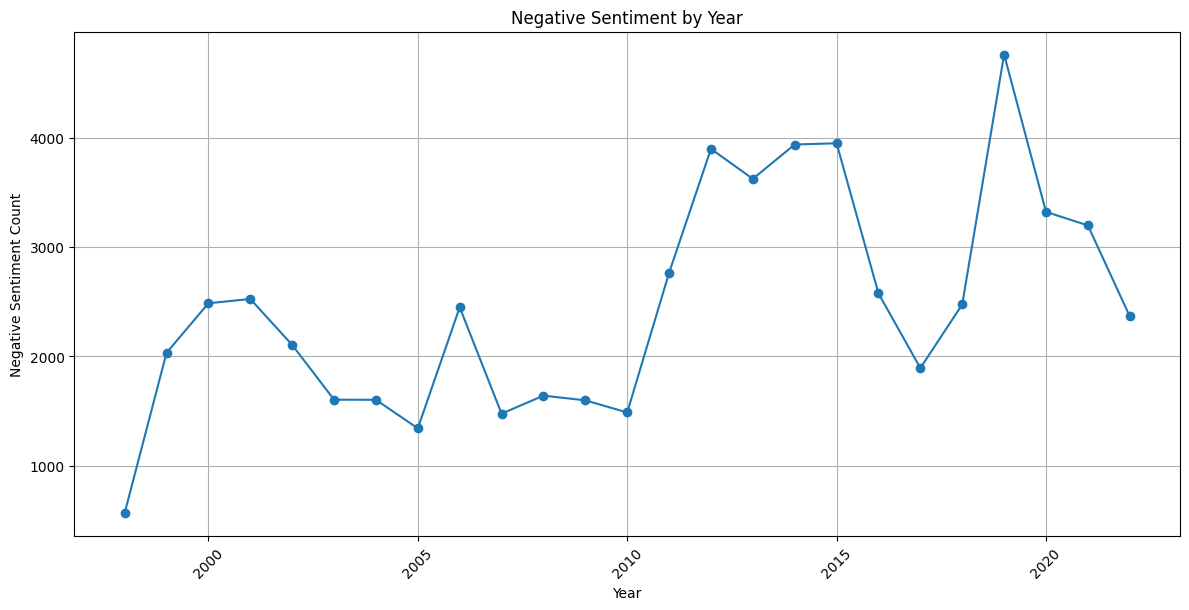

In [49]:
# Plot the 'Negative' sentiment by year
plt.figure(figsize=(12, 6))
plt.plot(yearly_sentiment["Year"], yearly_sentiment["Negative"], marker='o')
plt.title("Negative Sentiment by Year")
plt.xlabel("Year")
plt.ylabel("Negative Sentiment Count")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

**Uncertainty Sentiment by Year**

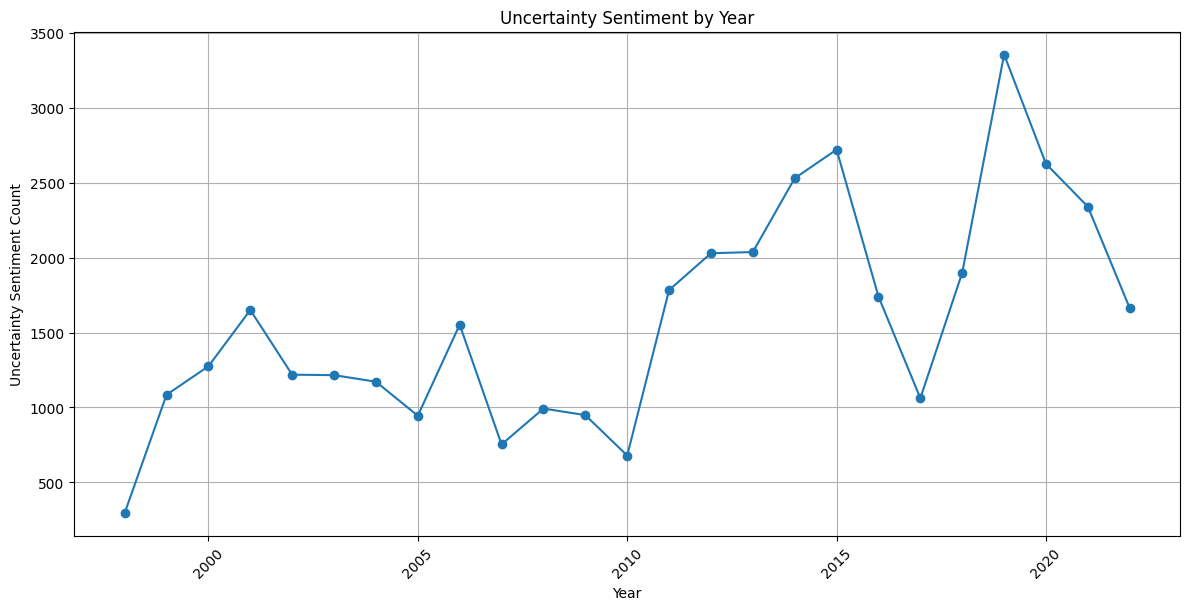

In [50]:
# Plot the 'Uncertainty' sentiment by year
plt.figure(figsize=(12, 6))
plt.plot(yearly_sentiment["Year"], yearly_sentiment["Uncertainty"], marker='o')
plt.title("Uncertainty Sentiment by Year")
plt.xlabel("Year")
plt.ylabel("Uncertainty Sentiment Count")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

**Positive Sentiment by Year**

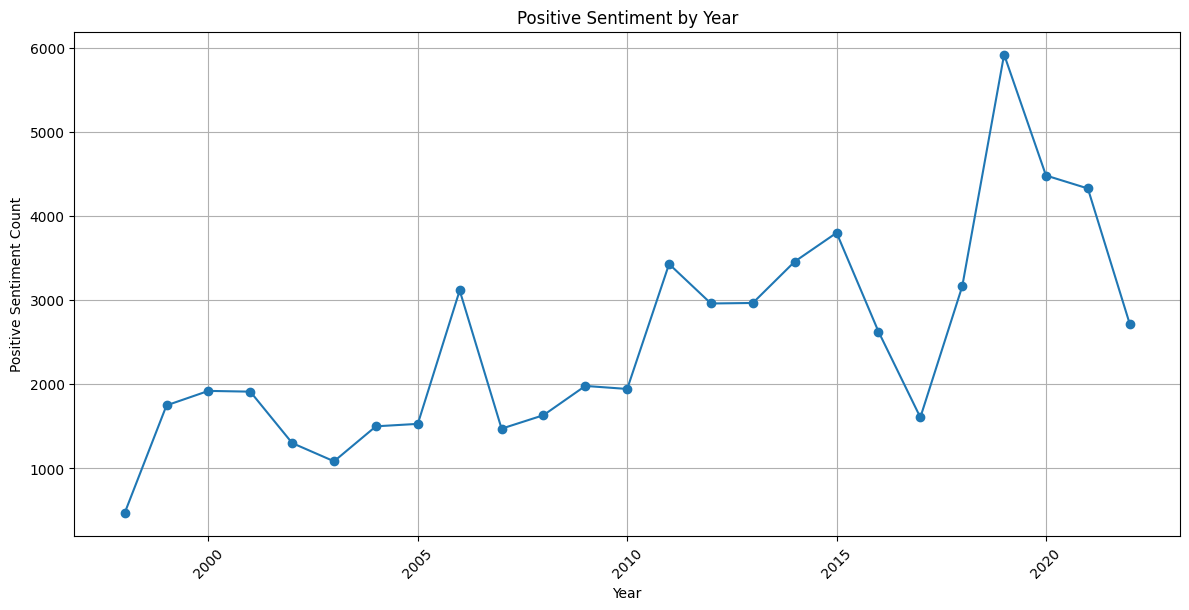

In [52]:
# Plot the 'Positive' sentiment by year
plt.figure(figsize=(12, 6))
plt.plot(yearly_sentiment["Year"], yearly_sentiment["Positive"], marker='o')
plt.title("Positive Sentiment by Year")
plt.xlabel("Year")
plt.ylabel("Positive Sentiment Count")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

**Calculate Sentiment Scores (Net Sentiment, Ratios, etc.)**

In [37]:
# Net sentiment score: positive minus negative
df_uk["NetSentiment"] = df_uk["Positive"] - df_uk["Negative"]

# Total sentiment words (optional)
df_uk["TotalSentimentWords"] = df_uk[["Negative", "Positive", "Uncertainty", "Litigious", "Strong", "Weak", "Constraining"]].sum(axis=1)

# Ratio-based scores
df_uk["PositiveRatio"] = df_uk["Positive"] / df_uk["TotalSentimentWords"]
df_uk["NegativeRatio"] = df_uk["Negative"] / df_uk["TotalSentimentWords"]
df_uk["UncertaintyRatio"] = df_uk["Uncertainty"] / df_uk["TotalSentimentWords"]

df_uk


,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text,Len,...,Uncertainty,Litigious,Strong,Weak,Constraining,NetSentiment,TotalSentimentWords,PositiveRatio,NegativeRatio,UncertaintyRatio
0,r980915a_BOE,United Kingdom,1998-09-15,1998,September,Speech,George,Yes,thank you chairman im actually very pleased to...,13731,...,35,5,18,14,13,-38,233,0.236052,0.399142,0.150215
1,r981021b_BOE,United Kingdom,1998-10-21,1998,October,Britain in Europe,George,Yes,its a great pleasure to be here in the beautif...,24263,...,37,2,17,16,12,-29,171,0.169591,0.339181,0.216374
2,r981021a_BOE,United Kingdom,1998-10-21,1998,October,Impact of the recent turbulence in internation...,King,No,few industries have suffered more from volatil...,13678,...,35,8,53,15,13,22,236,0.283898,0.190678,0.148305
3,r981101a_BOE,United Kingdom,1998-11-01,1998,November,"Economic policy, with and without forecasts",Budd,No,my topic this evening is the use of forecasts ...,27679,...,47,6,23,20,8,-11,219,0.237443,0.287671,0.214612
4,r981101b_BOE,United Kingdom,1998-11-01,1998,November,Inflation targeting in practice: the UK experi...,Vickers,No,six years ago this week sterling left the exch...,27693,...,46,6,24,27,11,-12,252,0.250000,0.297619,0.182540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,r220428a_BOE,United Kingdom,2022-04-28,2022,April,Macropru,Breeden,No,dimitri demekas and paul tucker for helpful di...,17444,...,14,39,10,13,5,-15,162,0.203704,0.296296,0.086420
1205,r220426a_BOE,United Kingdom,2022-04-26,2022,April,Bufferati,Woods,No,copies of publications are available from this...,123096,...,15,6,7,10,4,0,66,0.181818,0.181818,0.227273
1206,r220503a_BOE,United Kingdom,2022-05-03,2022,May,Why macroprudential policy needs to tackle fin...,Stheeman,No,elisabeth stheeman notes that climate change a...,12729,...,11,38,11,7,3,13,121,0.264463,0.157025,0.090909
1207,r221019a_BOE,United Kingdom,2022-10-19,2022,October,"Governance of “Decentralised” Finance: Get up,...",Wilkins,No,these are divided into seven categories suffra...,33040,...,29,8,15,15,10,0,177,0.282486,0.282486,0.163842


**Trend Analysis Over Time:**

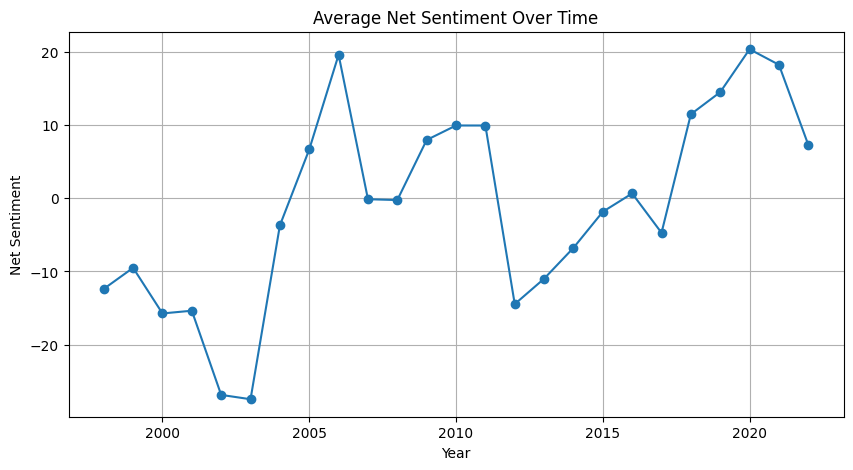

In [38]:
# Average NetSentiment by Year
yearly_sentiment = df_uk.groupby("Year")["NetSentiment"].mean().reset_index()

# Plot if desired
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(yearly_sentiment["Year"], yearly_sentiment["NetSentiment"], marker='o')
plt.title("Average Net Sentiment Over Time")
plt.xlabel("Year")
plt.ylabel("Net Sentiment")
plt.grid(True)
plt.show()


**Classify speeches as positive, negative, or neutral:**

In [39]:
def classify_sentiment(row):
    if row["NetSentiment"] > 0:
        return "Positive"
    elif row["NetSentiment"] < 0:
        return "Negative"
    else:
        return "Neutral"

df_uk["SentimentLabel"] = df_uk.apply(classify_sentiment, axis=1)

df_uk


,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text,Len,...,Litigious,Strong,Weak,Constraining,NetSentiment,TotalSentimentWords,PositiveRatio,NegativeRatio,UncertaintyRatio,SentimentLabel
0,r980915a_BOE,United Kingdom,1998-09-15,1998,September,Speech,George,Yes,thank you chairman im actually very pleased to...,13731,...,5,18,14,13,-38,233,0.236052,0.399142,0.150215,Negative
1,r981021b_BOE,United Kingdom,1998-10-21,1998,October,Britain in Europe,George,Yes,its a great pleasure to be here in the beautif...,24263,...,2,17,16,12,-29,171,0.169591,0.339181,0.216374,Negative
2,r981021a_BOE,United Kingdom,1998-10-21,1998,October,Impact of the recent turbulence in internation...,King,No,few industries have suffered more from volatil...,13678,...,8,53,15,13,22,236,0.283898,0.190678,0.148305,Positive
3,r981101a_BOE,United Kingdom,1998-11-01,1998,November,"Economic policy, with and without forecasts",Budd,No,my topic this evening is the use of forecasts ...,27679,...,6,23,20,8,-11,219,0.237443,0.287671,0.214612,Negative
4,r981101b_BOE,United Kingdom,1998-11-01,1998,November,Inflation targeting in practice: the UK experi...,Vickers,No,six years ago this week sterling left the exch...,27693,...,6,24,27,11,-12,252,0.250000,0.297619,0.182540,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,r220428a_BOE,United Kingdom,2022-04-28,2022,April,Macropru,Breeden,No,dimitri demekas and paul tucker for helpful di...,17444,...,39,10,13,5,-15,162,0.203704,0.296296,0.086420,Negative
1205,r220426a_BOE,United Kingdom,2022-04-26,2022,April,Bufferati,Woods,No,copies of publications are available from this...,123096,...,6,7,10,4,0,66,0.181818,0.181818,0.227273,Neutral
1206,r220503a_BOE,United Kingdom,2022-05-03,2022,May,Why macroprudential policy needs to tackle fin...,Stheeman,No,elisabeth stheeman notes that climate change a...,12729,...,38,11,7,3,13,121,0.264463,0.157025,0.090909,Positive
1207,r221019a_BOE,United Kingdom,2022-10-19,2022,October,"Governance of “Decentralised” Finance: Get up,...",Wilkins,No,these are divided into seven categories suffra...,33040,...,8,15,15,10,0,177,0.282486,0.282486,0.163842,Neutral


In [43]:
%%time
# Demo: Using a self defined function with Textblob to calculate polarity and subjectivity.
def generate_polarity_subjectivity(dfs):
    dft2 = TextBlob(dfs).sentiment
    return pd.Series([dft2[0], dft2[1]])

# Apply the function to the data and add two new columns
df_uk[['polarity','subjectivity']] = df_uk['Text'].apply(generate_polarity_subjectivity)
df_uk.head()

CPU times: total: 17.8 s
Wall time: 18.3 s


,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text,Len,...,Weak,Constraining,NetSentiment,TotalSentimentWords,PositiveRatio,NegativeRatio,UncertaintyRatio,SentimentLabel,polarity,subjectivity
0,r980915a_BOE,United Kingdom,1998-09-15,1998,September,Speech,George,Yes,thank you chairman im actually very pleased to...,13731,...,14,13,-38,233,0.236052,0.399142,0.150215,Negative,0.083288,0.435206
1,r981021b_BOE,United Kingdom,1998-10-21,1998,October,Britain in Europe,George,Yes,its a great pleasure to be here in the beautif...,24263,...,16,12,-29,171,0.169591,0.339181,0.216374,Negative,0.076711,0.368726
2,r981021a_BOE,United Kingdom,1998-10-21,1998,October,Impact of the recent turbulence in internation...,King,No,few industries have suffered more from volatil...,13678,...,15,13,22,236,0.283898,0.190678,0.148305,Positive,0.091432,0.394993
3,r981101a_BOE,United Kingdom,1998-11-01,1998,November,"Economic policy, with and without forecasts",Budd,No,my topic this evening is the use of forecasts ...,27679,...,20,8,-11,219,0.237443,0.287671,0.214612,Negative,0.086707,0.476692
4,r981101b_BOE,United Kingdom,1998-11-01,1998,November,Inflation targeting in practice: the UK experi...,Vickers,No,six years ago this week sterling left the exch...,27693,...,27,11,-12,252,0.250000,0.297619,0.182540,Negative,0.058467,0.394488


In [42]:
%%time
# Demo: Frequency distribution review of a single speech.

import nltk
nltk.download('punkt_tab')

# Tokenise the text data.
stop_words=set(stopwords.words('english'))
filtered_text = []

# Example speech using iloc to reference (Hint: Can be used in loops if required).
tokenized_word = word_tokenize(df_uk.iloc[0,8])

# Filter the tokenised words.
for each_word in tokenized_word:
    if each_word.lower() not in stop_words and each_word.isalpha():
        filtered_text.append(each_word.lower())

# Display the filtered list.
#print('Tokenised list without stop words: {}'.format(filtered_text))

# Create a frequency distribution object.
freq_dist_of_words = FreqDist(filtered_text)

# Show the five most common elements in the data set.
freq_dist_of_words.most_common(10)

CPU times: total: 62.5 ms
Wall time: 51.3 ms


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[('economy', 26),
 ('inflation', 22),
 ('growth', 15),
 ('policy', 13),
 ('demand', 13),
 ('employment', 10),
 ('whole', 9),
 ('sectors', 9),
 ('know', 8),
 ('capacity', 8)]